In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0,0.5,'Magnitud')

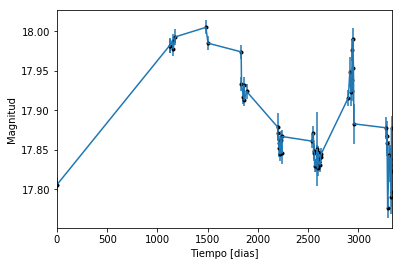

In [2]:
data = np.genfromtxt('LC_23309_I.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

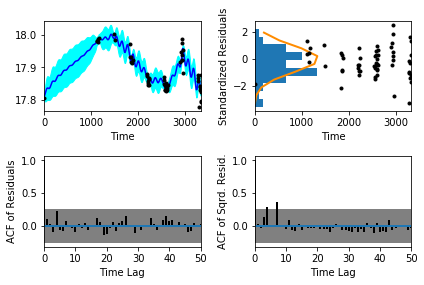

In [5]:
sample.assess_fit()

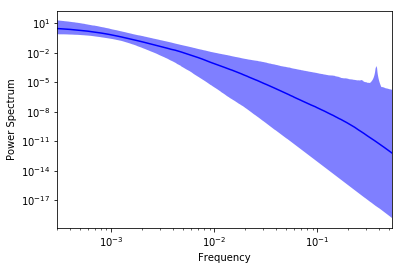

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.000375271,0.0142057,'Medida del nivel de ruido')

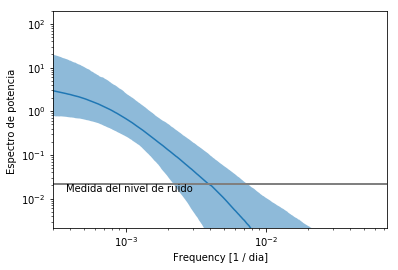

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))

Text(0.5,1,'Prediccion , valor esperado ')

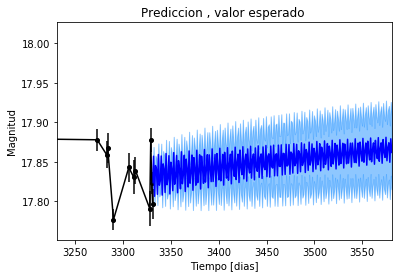

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado ')

Text(0.5,1,'Prediccion, Caminos simulados')

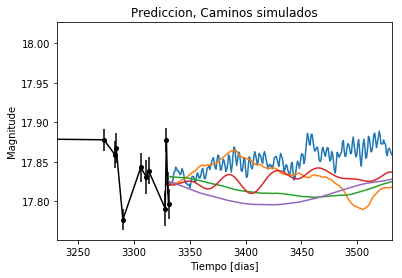

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitude')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


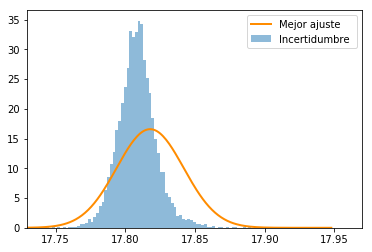

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')

Text(0.5,1,'Interpolacion, camino simulado')

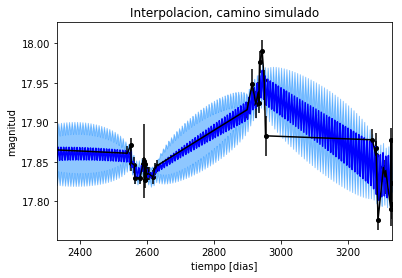

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')

Text(0.5,1,'Interpolacion, camino simulado')

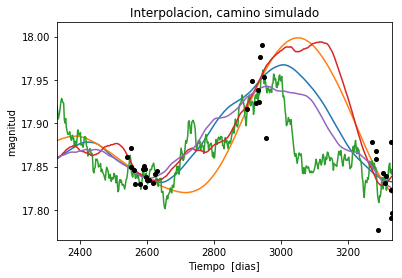

In [13]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 760.025827272
Median: 0.00994786864454
Standard deviation: 0.211203511207
68% credibility interval: [ 0.00081281  0.2029769 ]
95% credibility interval: [  3.38909876e-04   8.37446230e-01]
99% credibility interval: [  3.17635284e-04   1.01763486e+00]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 893.884425602
Median: 0.00173773459977
Standard deviation: 0.0962633302423
68% credibility interval: [ 0.00044038  0.0260467 ]
95% credibility interval: [ 0.00032495  0.27556318]
99% credibility interval: [  3.07065992e-04   8.13290656e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 668.910923011
Median: 0.0269984022132
Standard

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 911.203141881
Median: 157.837155269
Standard deviation: 1.75156340154
68% credibility interval: [ 156.13009399  158.88374768]
95% credibility interval: [ 153.76765901  162.96708992]
99% credibility interval: [ 151.81357595  163.07994496]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 476.437987458
Median: 0.802920263141
Standard deviation: 2.37046601216
68% credibility interval: [ 0.05851937  4.11284055]
95% credibility interval: [ 0.0139083   7.78743913]
99% credibility interval: [  9.93017355e-03   1.22755522e+01]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 719.255852508
Median: 0.725659664135
Standard deviation: 11.8499059559
68% credibility interval: [ 0.02018414  8.93124828]
95% credibility interval: [  1.2

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 7536.26948968
Median: 2.58300942157e-31
Standard deviation: 5.94132490565e+42
68% credibility interval: [  6.77492531e-67   6.06254274e-11]
95% credibility interval: [  3.54954921e-91   3.69369162e+00]
99% credibility interval: [  8.97431694e-102   1.35374221e+002]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2231.25863489
Median: 17.8932630417
Standard deviation: 0.043521527734
68% credibility interval: [ 17.85327937  17.92619806]
95% credibility interval: [ 17.79871626  17.97132945]
99% credibility interval: [ 17.7345744   18.01917279]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 196.339419349
Median: 0.016234973887
Standard deviation: 0.25841827978
68% credibility interval: [ 0.          0.37904352]
95% credibility interval: [ 0.          0.92209148]
99% credibility interval: [ 0.          1.03391349]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 196.339419349
Median: 0.016234973887
Standard deviation: 0.25841827978
68% credibility interval: [ 0.          0.37904352]
95% credibility interval: [ 0.          0.92209148]
99% credibility interval: [ 0.          1.03391349]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 677.094282275
Median: 0.0
Standard deviation: 0.000309449494111
68% credib

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 911.203141881
Median: 157.837155269
Standard deviation: 1.75156340154
68% credibility interval: [ 156.13009399  158.88374768]
95% credibility interval: [ 153.76765901  162.96708992]
99% credibility interval: [ 151.81357595  163.07994496]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 781.256741449
Median: 0.00572377444306
Standard deviation: 0.00811421634294
68% credibility interval: [ 0.003273    0.01163095]
95% credibility interval: [ 0.00231079  0.0291683 ]
99% credibility interval: [ 0.00177276  0.05274397]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1615.79246565
Median: 1.62089144554
Standard deviation: 0.239066777355
68% credibility interval: [ 1.36768402  1.85140137]
95% credibility interval: [ 1.01279318  1.97181674]
99% credibility interval: [ 0.97788848  1.99583859]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 273.162685597
Median: 9.55143991668e-05
Standard deviation: 0.118668915739
68% credibility interval: [  1.17465707e-06   6.65434789e-03]
95% credibility interval: [  3.63351770e-08   1.91405903e-01]
99% credibility interval: [  7.26454691e-09   7.31046168e-01]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 760.025827272
Median: (-0.0625043021051+0j)
Standard deviation: 2.09699302736
68% credibility interval: [-1.27534148-0.36410855j -0.00510703+0.j        ]
95% credibility interval: [ -5.26182985e+00+0.j          -2.12943355e-03-2.35212389j]
99% credibility interval: [ -6.39398838e+00+0.j          -1.99576135e-03-0.00221414j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 893.884425602
Median: (-0.0109185085051+0.0164811897805j)
Standard deviation: 1.73268602358
68% credibility interval: [-0.16365621+0.76674939j -0.00276696+0.81009199j]
95% credibility interval: [-1.73141452+0.53017894j -0.00204171+0.j        ]
99% credibility interval: [ -5.11005590e+00+5.37018556j  -1.92935253e-03+0.j        ]
Posterior summary for pa